In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set seed for reproducibility
np.random.seed(42)

# Define the statistical properties
mean_value = 10
std_dev = 2


In [2]:
# Function to generate datasets with different levels of spatial continuity
def generate_dataset(size, continuity_factor):
    x, y = np.meshgrid(np.arange(0, size, 1), np.arange(0, size, 1))
    noise = np.random.normal(0, std_dev * continuity_factor, size=(size, size))
    dataset = mean_value + noise
    return x, y, dataset


In [3]:
# Generate four datasets with different levels of spatial continuity
size = 20
continuity_factors = [0.1, 0.5, 0.8, 1.0]

datasets = [generate_dataset(size, cf) for cf in continuity_factors]



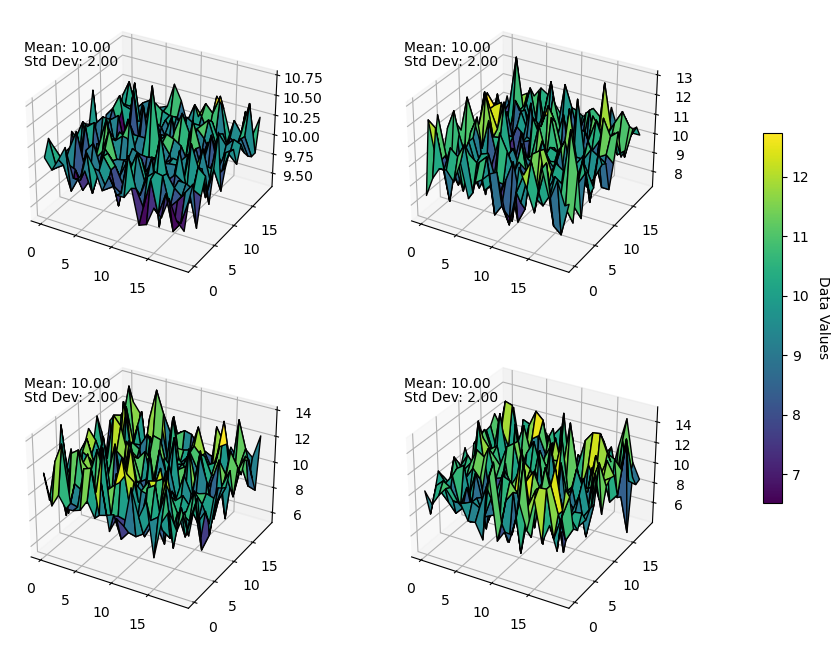

In [4]:
# Plot the datasets in 3D
fig = plt.figure(figsize=(12, 8))
#fig.suptitle('3D Surface Plots of Datasets with Varying Spatial Continuity', fontsize=16)

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    x, y, data = datasets[i]
    surface = ax.plot_surface(x, y, data, cmap='viridis', edgecolor='k')
    #ax.set_title(f'Dataset {i+1}, Continuity Factor: {continuity_factors[i]}')
    
    ax.text2D(0.05,0.85,f'Mean: {mean_value:.2f}',transform=ax.transAxes,color="black",fontsize=10)
    ax.text2D(0.05,0.80,f'Std Dev: {std_dev:.2f}',transform=ax.transAxes,color="black",fontsize=10)

# Add colorbar
cbar = fig.colorbar(surface, ax=fig.get_axes(), shrink=0.6, pad=0.1)
cbar.set_label('Data Values', rotation=270, labelpad=15)

#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()